15001


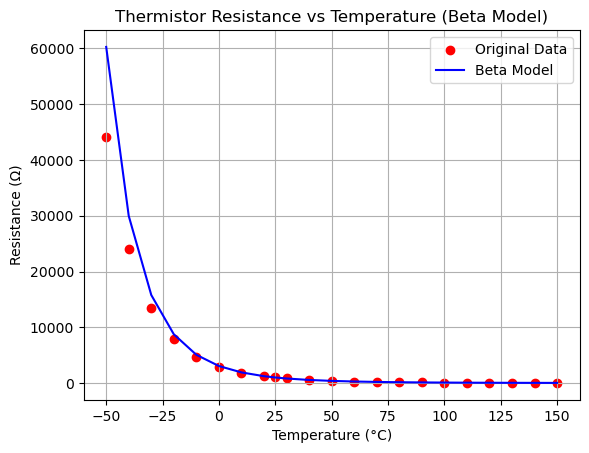

TF1:  [5.29889467 5.29864425 5.29839383 ... 2.69789506 2.69777942 2.69766379]


In [1]:
# Case 1, #1

import numpy as np
import matplotlib.pyplot as plt

temp = np.array([-50, -40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])
resistance = np.array([44130, 23980, 13520, 7981, 4754, 2949, 1879, 1226, 1000, 819.4, 559.2, 389.3, 276, 199, 145.8, 108.4, 81.68, 62.35, 48.18, 37.64, 29.72, 23.7])

# temperature array of closely spaced values from 15 to 30 degrees celcius
T = np.arange(15, 30.00005, 0.001)
print(len(T))
T_kelvb = T + 273.15

# ADC Acceptable Input Voltage Range from 0.17V to 3.3V
V = np.arange(0.17, 3.30005, 0.001)

# Create Beta model

# Model Parameters
R0 = 1000 # nominal resistance at T0 = 25C
T0 = 298.15 # Nominal temp in Kelvin (25C)
beta = 3636 # provided in datasheet

temp_kelvin = temp + 273.15 # temp array in Kelvin

# Model Resistance
B_model_resistance_entire_range = R0 * np.exp(beta * ((1/temp_kelvin) - (1/T0)))

# Create a new array of resistance values for the closely spaced temperature values
B_model_resistance_15_to_30 = R0 * np.exp(beta * ((1/T_kelvb) - (1/T0)))

# Plot Data
plt.scatter(temp, resistance, label="Original Data", color='red')
plt.plot(temp, B_model_resistance_entire_range, label="Beta Model", color='blue')
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ω)")
plt.title("Thermistor Resistance vs Temperature (Beta Model)")
plt.legend()
plt.grid()
plt.show()

# This TF is the temperature factor, where temp is in Kelvin (NL / temp)
TF1 = B_model_resistance_15_to_30 / T_kelvb

# Modify TF1 to only include values from 15 to 30 degrees celcius
print("TF1: ", TF1)

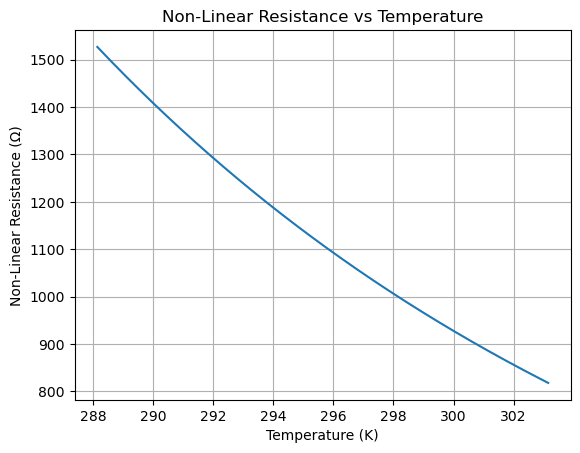

In [2]:
# Non-Linear Resistance vs Temperature (K)

# results from the TF1 array
plt.plot(T_kelvb, B_model_resistance_15_to_30)
plt.xlabel("Temperature (K)")
plt.ylabel("Non-Linear Resistance (Ω)")
plt.title("Non-Linear Resistance vs Temperature")
plt.grid()
plt.show()

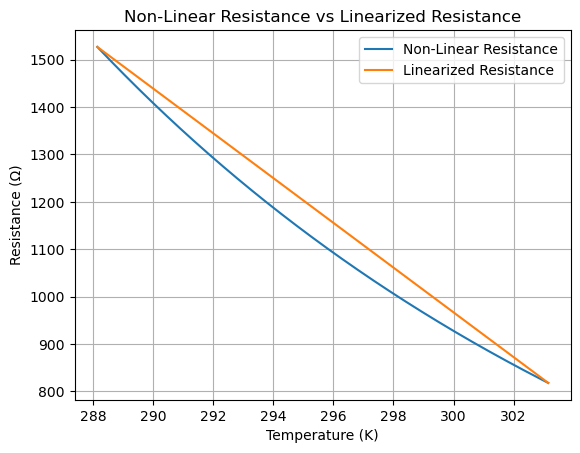

TF2:  [1.         1.00001283 1.00002566 1.00003849 1.00005132]


In [3]:
#===================================
# Case 1, #2
#===================================

# Non-Linear Resistance
NL_R = B_model_resistance_15_to_30

# Temp Range from 15 to 30 degrees celcius in Kelvin
T = np.arange(15, 30.00005, 0.001)
T_kelvb = T + 273.15

# ==========================================
# use 3 point method to calculate the slope
# ==========================================

# Calculate the slope between 15 and 30 degrees celcius
slope = (NL_R[-1] - NL_R[0]) / (T_kelvb[-1] - T_kelvb[0])
#print("Slope: ", slope)

# Calculate the intercept
# y = mx + b
# b = y - mx
b = NL_R[0] - (slope * T_kelvb[0])
#print("Intercept: ", b)

# Calculate the linearized resistance
L_R = (slope * T_kelvb) + b

# ==========================================
# Linear and Non-Linear Resistance vs Temperature (Kelvin)
# ==========================================
plt.plot(T_kelvb, NL_R, label="Non-Linear Resistance")
plt.plot(T_kelvb, L_R, label="Linearized Resistance")
plt.xlabel("Temperature (K)")
plt.ylabel("Resistance (Ω)")
plt.title("Non-Linear Resistance vs Linearized Resistance")
plt.legend()
plt.grid()
plt.show()

TF2 = L_R / NL_R
print("TF2: ", TF2[:5])


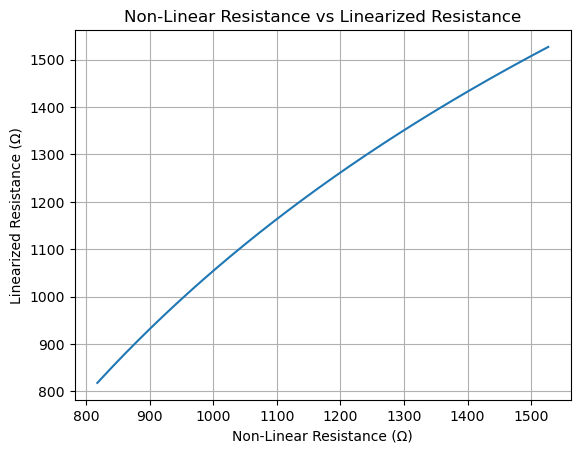

In [4]:
# ==========================================
# Non-Linear Resistance vs Linearized Resistance
# ==========================================

# Results from TF2 array
plt.plot(NL_R, L_R)
plt.xlabel("Non-Linear Resistance (Ω)")
plt.ylabel("Linearized Resistance (Ω)")
plt.title("Non-Linear Resistance vs Linearized Resistance")
plt.grid()
plt.show()

Bridge Output is between: 0.52127 V and -0.25058 V
TF3:  [0.0003414  0.00034137 0.00034135 0.00034133 0.0003413 ]


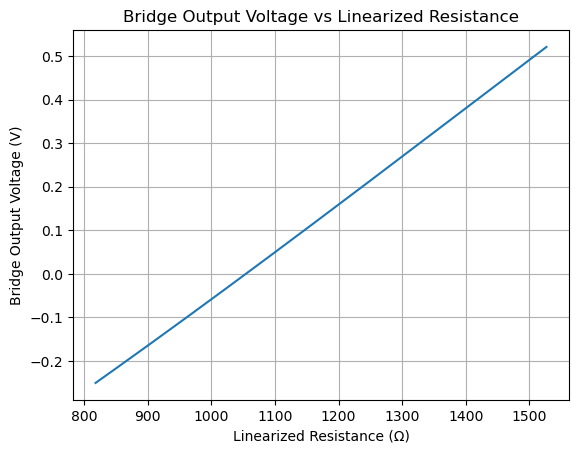

In [5]:
# ==========================================
# Case 1, #3
# ==========================================

# Temp Range from 15 to 30 degrees celcius in Kelvin
T = np.arange(15, 30.00005, 0.001)
T_kelvb = T + 273.15

# Calculate the bridge output voltage
def V_Wheatstone(R, R_fixed=1000, V_in=5):
    V_out = ((R / (R + R_fixed)) - 0.5) * V_in
    return V_out

V_bridge = V_Wheatstone(NL_R)
#print("Bridge Output Voltage: ", V_bridge)
print(f"Bridge Output is between: {V_bridge[0].round(5)} V and {V_bridge[-1].round(5)} V")

TF3 = V_bridge / L_R
print("TF3: ", TF3[:5])

# ==========================================
# Bridge Output Voltage vs Linearized Resistance
# ==========================================
plt.plot(L_R, V_bridge)
plt.xlabel("Linearized Resistance (Ω)")
plt.ylabel("Bridge Output Voltage (V)")
plt.title("Bridge Output Voltage vs Linearized Resistance")
plt.grid()
plt.show()

In [6]:
# ==========================================
# Case 1, #4
# ==========================================

# Temp Range from 15 to 30 degrees celcius in Kelvin
T = np.arange(15, 30.00005, 0.001)
T_kelvb = T + 273.15

# ==========================================
# Instrumentation Amplifier Transfer Function
# ========================================== 

# based on the INA115 Data Sheet
# https://www.ti.com/lit/ds/symlink/ina115.pdf?ts=1739704995293
# Page 8, Figure 1

# Calculate the Instrumentation Amplifier Output Voltage to be between 0 and 3.3V
def V_instrumentation_amplifier(V_bridge, V2=0, Gain=4.3):
    V_out = (V_bridge - V2) * Gain
    return V_out

V_instrumentation = V_instrumentation_amplifier(V_bridge)

# DC Voltage Bias to get the output voltage to be between 0 and 3.3V
V_Bias = 0 - V_instrumentation[-1]
print("DC Voltage Bias: ", V_Bias)

V_instrumentation = V_instrumentation + V_Bias

print(f"Instrumentation Amplifier Output Voltage: {V_instrumentation}")
print(f"Instrumentation Amplifier Output is between: {V_instrumentation[0].round(5)} V and {V_instrumentation[-1].round(5)} V")
print(f'Instrument Amplifier Range Difference: {V_instrumentation[0] - V_instrumentation[-1]} V')

TF4 = V_instrumentation / V_bridge

DC Voltage Bias:  1.0775047367210935
Instrumentation Amplifier Output Voltage: [3.31897652e+00 3.31875138e+00 3.31852623e+00 ... 4.21052751e-04
 2.10525263e-04 0.00000000e+00]
Instrumentation Amplifier Output is between: 3.31898 V and 0.0 V
Instrument Amplifier Range Difference: 3.3189765212344735 V


In [7]:
# ==========================================
# Final Transfer Function (Case 1) (V_ADC_output / temp(K))
# ==========================================
TF_5 = TF1 * TF2 * TF3 * TF4

# Voltage the ADC will see
V_ADC_output = V_instrumentation


# Create a loop that will check if the ADC output is within the acceptable range
# If it is not, then the value will be set to the minimum or maximum value
# ADC Acceptable Input Voltage Range from 0.17V to 3.3V
for i in range(len(V_ADC_output)):
    if V_ADC_output[i] < 0.17:
        V_ADC_output[i] = 0.17
    elif V_ADC_output[i] > 3.3:
        V_ADC_output[i] = 3.3
    else:
        V_ADC_output[i] = V_ADC_output[i]

# Create a loop that maps the ADC output to the 12-bit range of 0 to 4095
# ADC Output = (1296 * V_ADC_output) - 188
# If the ADC output is less than 0, then set it to 0
# If the ADC output is greater than 4095, then set it to 4095
# Round the ADC output to the nearest integer

TF_Final = ((1296 * V_ADC_output) - 188).round(0)

for i in range(len(TF_Final)):
    if TF_Final[i] < 0:
        TF_Final[i] = 0
    elif TF_Final[i] > 4095:
        TF_Final[i] = 4095
    else:
        TF_Final[i] = TF_Final[i]

print("ADC Output: ", TF_Final[:5])
print("ADC Output: ", TF_Final[-5:])

# Matches closely with the data from Lab 1

ADC Output:  [4089. 4089. 4089. 4089. 4089.]
ADC Output:  [32. 32. 32. 32. 32.]


15001


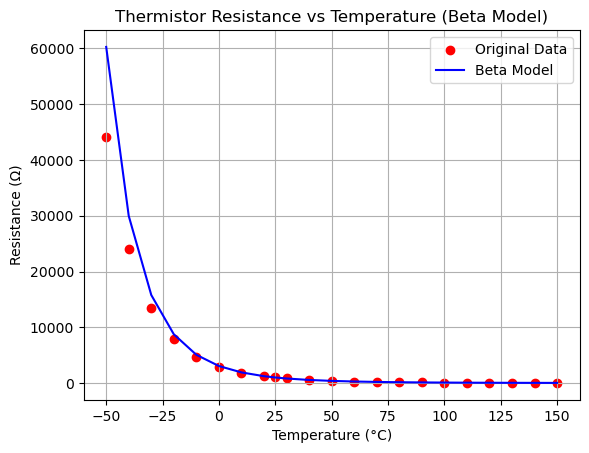

TF1:  [2.70069679e+02 1.28506559e+02 6.48842718e+01 3.45219446e+01
 1.92409694e+01 1.11774439e+01 6.73841646e+00 4.19995432e+00
 3.35401643e+00 2.69766379e+00 1.78054275e+00 1.20463376e+00
 8.33569151e-01 5.88801094e-01 4.23825647e-01 3.10406399e-01
 2.30995231e-01 1.74449659e-01 1.33552421e-01 1.03541621e-01
 8.12209971e-02 6.44105668e-02]


In [8]:
# Case 2, #1

import numpy as np
import matplotlib.pyplot as plt

temp = np.array([-50, -40, -30, -20, -10, 0, 10, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150])
resistance = np.array([44130, 23980, 13520, 7981, 4754, 2949, 1879, 1226, 1000, 819.4, 559.2, 389.3, 276, 199, 145.8, 108.4, 81.68, 62.35, 48.18, 37.64, 29.72, 23.7])

# temperature array of closely spaced values from 15 to 30 degrees celcius
T = np.arange(15, 30.00005, 0.001)
print(len(T))
T_kelvb = T + 273.15

# ADC Acceptable Input Voltage Range from 0.17V to 3.3V
V = np.arange(0.17, 3.30005, 0.001)

# Create Beta model

# Model Parameters
R0 = 1000 # nominal resistance at T0 = 25C
T0 = 298.15 # Nominal temp in Kelvin (25C)
beta = 3636 # provided in datasheet

temp_kelvin = temp + 273.15 # temp array in Kelvin

# Model Resistance
B_model_resistance_entire_range = R0 * np.exp(beta * ((1/temp_kelvin) - (1/T0)))

# Create a new array of resistance values for the closely spaced temperature values
B_model_resistance_15_to_30 = R0 * np.exp(beta * ((1/T_kelvb) - (1/T0)))

# Plot Data
plt.scatter(temp, resistance, label="Original Data", color='red')
plt.plot(temp, B_model_resistance_entire_range, label="Beta Model", color='blue')
plt.xlabel("Temperature (°C)")
plt.ylabel("Resistance (Ω)")
plt.title("Thermistor Resistance vs Temperature (Beta Model)")
plt.legend()
plt.grid()
plt.show()

# This TF is the temperature factor, where temp is in Kelvin (NL / temp)
TF1 = B_model_resistance_entire_range / temp_kelvin

# Modify TF1 to only include values for Entire Range
print("TF1: ", TF1)

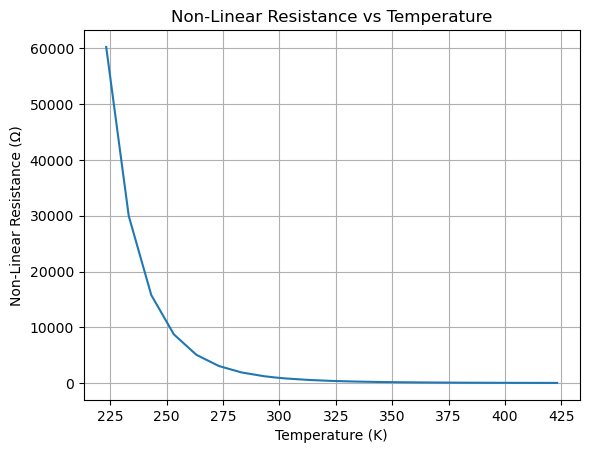

In [9]:
# Non-Linear Resistance vs Temperature (K)

# results from the TF1 array
plt.plot(temp_kelvin, B_model_resistance_entire_range)
plt.xlabel("Temperature (K)")
plt.ylabel("Non-Linear Resistance (Ω)")
plt.title("Non-Linear Resistance vs Temperature")
plt.grid()
plt.show()

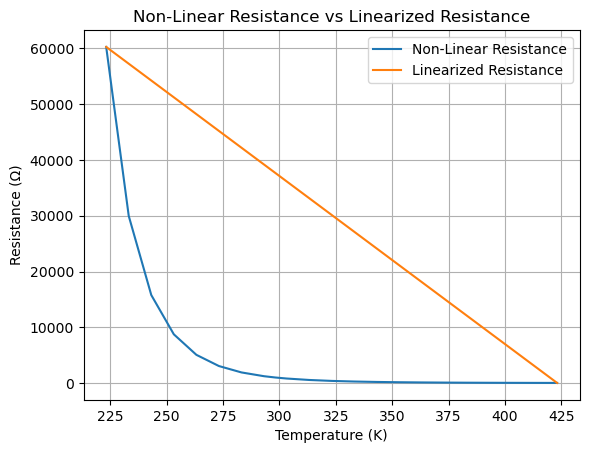

TF2:  [1.         1.91093515 3.4381383  5.86209862 9.52316882]


In [10]:
#===================================
# Case 2, #2
#===================================

# Non-Linear Resistance
NL_R = B_model_resistance_entire_range


# ==========================================
# use 3 point method to calculate the slope
# ==========================================

# Calculate the slope between 15 and 30 degrees celcius
slope = (NL_R[-1] - NL_R[0]) / (temp_kelvin[-1] - temp_kelvin[0])
#print("Slope: ", slope)

# Calculate the intercept
# y = mx + b
# b = y - mx
b = NL_R[0] - (slope * temp_kelvin[0])
#print("Intercept: ", b)

# Calculate the linearized resistance
L_R = (slope * temp_kelvin) + b

# ==========================================
# Linear and Non-Linear Resistance vs Temperature (Kelvin)
# ==========================================
plt.plot(temp_kelvin, NL_R, label="Non-Linear Resistance")
plt.plot(temp_kelvin, L_R, label="Linearized Resistance")
plt.xlabel("Temperature (K)")
plt.ylabel("Resistance (Ω)")
plt.title("Non-Linear Resistance vs Linearized Resistance")
plt.legend()
plt.grid()
plt.show()

TF2 = L_R / NL_R
print("TF2: ", TF2[:5])

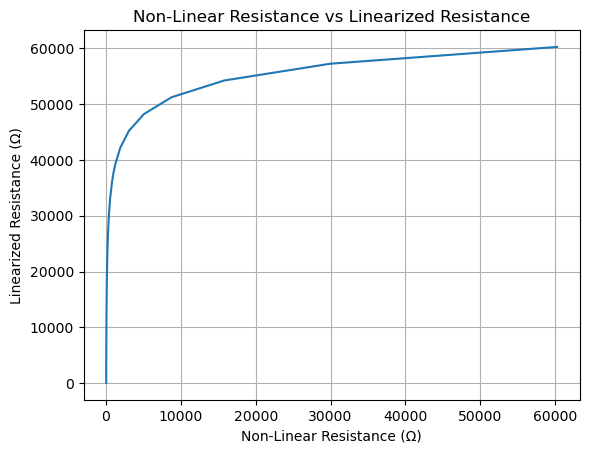

In [11]:
# ==========================================
# Non-Linear Resistance vs Linearized Resistance
# ==========================================

# Results from TF2 array
plt.plot(NL_R, L_R)
plt.xlabel("Non-Linear Resistance (Ω)")
plt.ylabel("Linearized Resistance (Ω)")
plt.title("Non-Linear Resistance vs Linearized Resistance")
plt.grid()
plt.show()

Bridge Output is between: 2.41839 V and -2.36734 V
TF3:  [4.01285430e-05 4.08443713e-05 4.05950950e-05 3.87781279e-05
 3.47453477e-05]


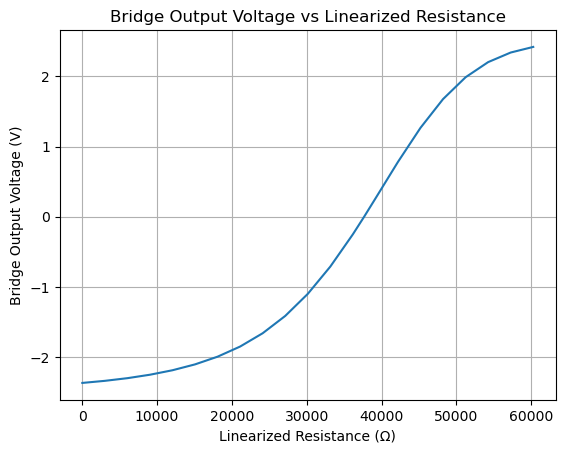

In [12]:
# ==========================================
# Case 2, #3
# ==========================================


# Calculate the bridge output voltage
def V_Wheatstone(R, R_fixed=1000, V_in=5):
    V_out = ((R / (R + R_fixed)) - 0.5) * V_in
    return V_out

V_bridge = V_Wheatstone(NL_R)
#print("Bridge Output Voltage: ", V_bridge)
print(f"Bridge Output is between: {V_bridge[0].round(5)} V and {V_bridge[-1].round(5)} V")

TF3 = V_bridge / L_R
print("TF3: ", TF3[:5])

# ==========================================
# Bridge Output Voltage vs Linearized Resistance
# ==========================================
plt.plot(L_R, V_bridge)
plt.xlabel("Linearized Resistance (Ω)")
plt.ylabel("Bridge Output Voltage (V)")
plt.title("Bridge Output Voltage vs Linearized Resistance")
plt.grid()
plt.show()

In [13]:
# ==========================================
# Case 2, #4
# ==========================================

# ==========================================
# Instrumentation Amplifier Transfer Function
# ========================================== 

# based on the INA115 Data Sheet
# https://www.ti.com/lit/ds/symlink/ina115.pdf?ts=1739704995293
# Page 8, Figure 1

# Calculate the Instrumentation Amplifier Output Voltage to be between 0 and 3.3V
def V_instrumentation_amplifier(V_bridge, V2=0, Gain=1):
    V_out = (V_bridge - V2) * Gain
    return V_out

V_instrumentation = V_instrumentation_amplifier(V_bridge)

# DC Voltage Bias to get the output voltage to be between 0 and 3.3V
V_Bias = 0 - V_instrumentation[-1]
print("DC Voltage Bias: ", V_Bias)

V_instrumentation = V_instrumentation + V_Bias

#print(f"Instrumentation Amplifier Output Voltage: {V_instrumentation}")
#print(f"Instrumentation Amplifier Output is between: {V_instrumentation[0].round(5)} V and {V_instrumentation[-1].round(5)} V")
#print(f'Instrument Amplifier Range Difference: {V_instrumentation[0] - V_instrumentation[-1]} V')

TF4 = V_instrumentation / V_bridge

DC Voltage Bias:  2.367339061149336


C:\Users\Brayden\AppData\Local\Temp\ipykernel_22768\3752106255.py:30: RuntimeWarning: divide by zero encountered in divide
  TF4 = V_instrumentation / V_bridge


In [14]:
# ==========================================
# Final Transfer Function (Case 2) (V_ADC_output / temp(K))
# ==========================================
TF5 = TF1 * TF2 * TF3 * TF4

# Voltage the ADC will see
V_ADC_output = V_instrumentation


# Create a loop that will check if the ADC output is within the acceptable range
# If it is not, then the value will be set to the minimum or maximum value
# ADC Acceptable Input Voltage Range from 0.17V to 3.3V
for i in range(len(V_ADC_output)):
    if V_ADC_output[i] < 0.17:
        V_ADC_output[i] = 0.17
    elif V_ADC_output[i] > 3.3:
        V_ADC_output[i] = 3.3
    else:
        V_ADC_output[i] = V_ADC_output[i]

# Create a loop that maps the ADC output to the 12-bit range of 0 to 4095
# ADC Output = (1296 * V_ADC_output) - 188
# If the ADC output is less than 0, then set it to 0
# If the ADC output is greater than 4095, then set it to 4095
# Round the ADC output to the nearest integer

TF_Final = ((1296 * V_ADC_output) - 188).round(0)

for i in range(len(TF_Final)):
    if TF_Final[i] < 0:
        TF_Final[i] = 0
    elif TF_Final[i] > 4095:
        TF_Final[i] = 4095
    else:
        TF_Final[i] = TF_Final[i]

print("ADC Output: ", TF_Final[:5])
print("ADC Output: ", TF_Final[-5:])

# Matches closely with the data from Lab 1

ADC Output:  [4089. 4089. 4089. 4089. 4089.]
ADC Output:  [46. 32. 32. 32. 32.]


C:\Users\Brayden\AppData\Local\Temp\ipykernel_22768\1983040200.py:4: RuntimeWarning: invalid value encountered in multiply
  TF5 = TF1 * TF2 * TF3 * TF4
